# Clustering - K-means, Hierarchical, DBSCAN

- Perform clustering for the airlines data to obtain optimum number of clusters. 
- Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlines contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

|Features|Description|
|:----|:----|
|ID|Unique ID|
|Balance|Number of miles eligible for award travel|
|Qual_mile|Number of miles counted as qualifying for Topflight status|
|cc1_miles|Number of miles earned with freq. flyer credit card in the past 12 months|
|cc2_miles|Number of miles earned with Rewards credit card in the past 12 months|
|cc3_miles|Number of miles earned with Small Business credit card in the past 12 months|
|1|under 5,000|
|2|5,000 - 10,000|
|3|10,001 - 25,000|
|4|25,001 - 50,000|
|5|over 50,000|
|Bonus_miles|Number of miles earned from non-flight bonus transactions in the past 12 months|
|Bonus_trans|Number of non-flight bonus transactions in the past 12 months|
|Flight_miles_12mo|Number of flight miles in the past 12 months|
|Flight_trans_12|Number of flight transactions in the past 12 months|
|Days_since_enrolled|Number of days since enrolled in flier program|
|Award|whether that person had award flight (free flight) or not|


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Airlines.xlsx')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
X = df.drop(columns='ID#')

In [8]:
X.shape

(3999, 11)

### K-Means Clustering

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
X = model.fit_transform(X)

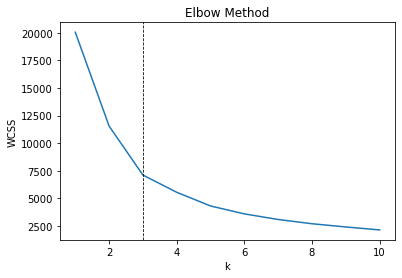

In [12]:
# Finding optimal number of clusters - elbow method
from sklearn.cluster import KMeans
wcss = []
for n_clusters in range(1,11):
    model = KMeans(n_clusters=n_clusters,random_state=42) # kmeans++ init to overcome random initialisation trap
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(1,11),wcss)
plt.axvline(x=3,color='k',ls='--',lw=0.8)
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS');

# optimum nunber of cluster is 3

In [13]:
model = KMeans(n_clusters=3,random_state=42)
cluster = model.fit_predict(X) # model.fit(X) + model.labels_

In [14]:
X_df = pd.DataFrame(data=X,columns=['PCA_1','PCA_2'])
X_df['Cluster'] = pd.Series(cluster)
X_df.head()

,PCA_1,PCA_2,Cluster
0,-1.466674,-0.067183,0
1,-1.450564,-0.063743,0
2,-1.210051,-0.133555,0
3,-1.507201,-0.061529,0
4,3.006984,-0.185534,1


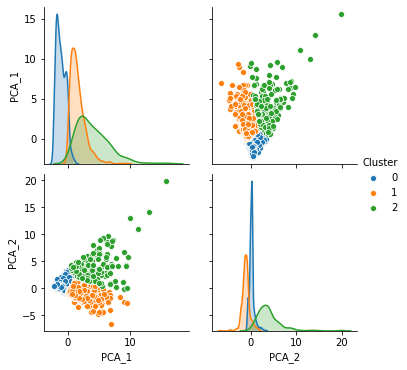

In [15]:
sns.pairplot(data=X_df,hue='Cluster');

In [16]:
X = df.drop(columns='ID#')
X['Cluster'] = pd.Series(cluster)
X.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

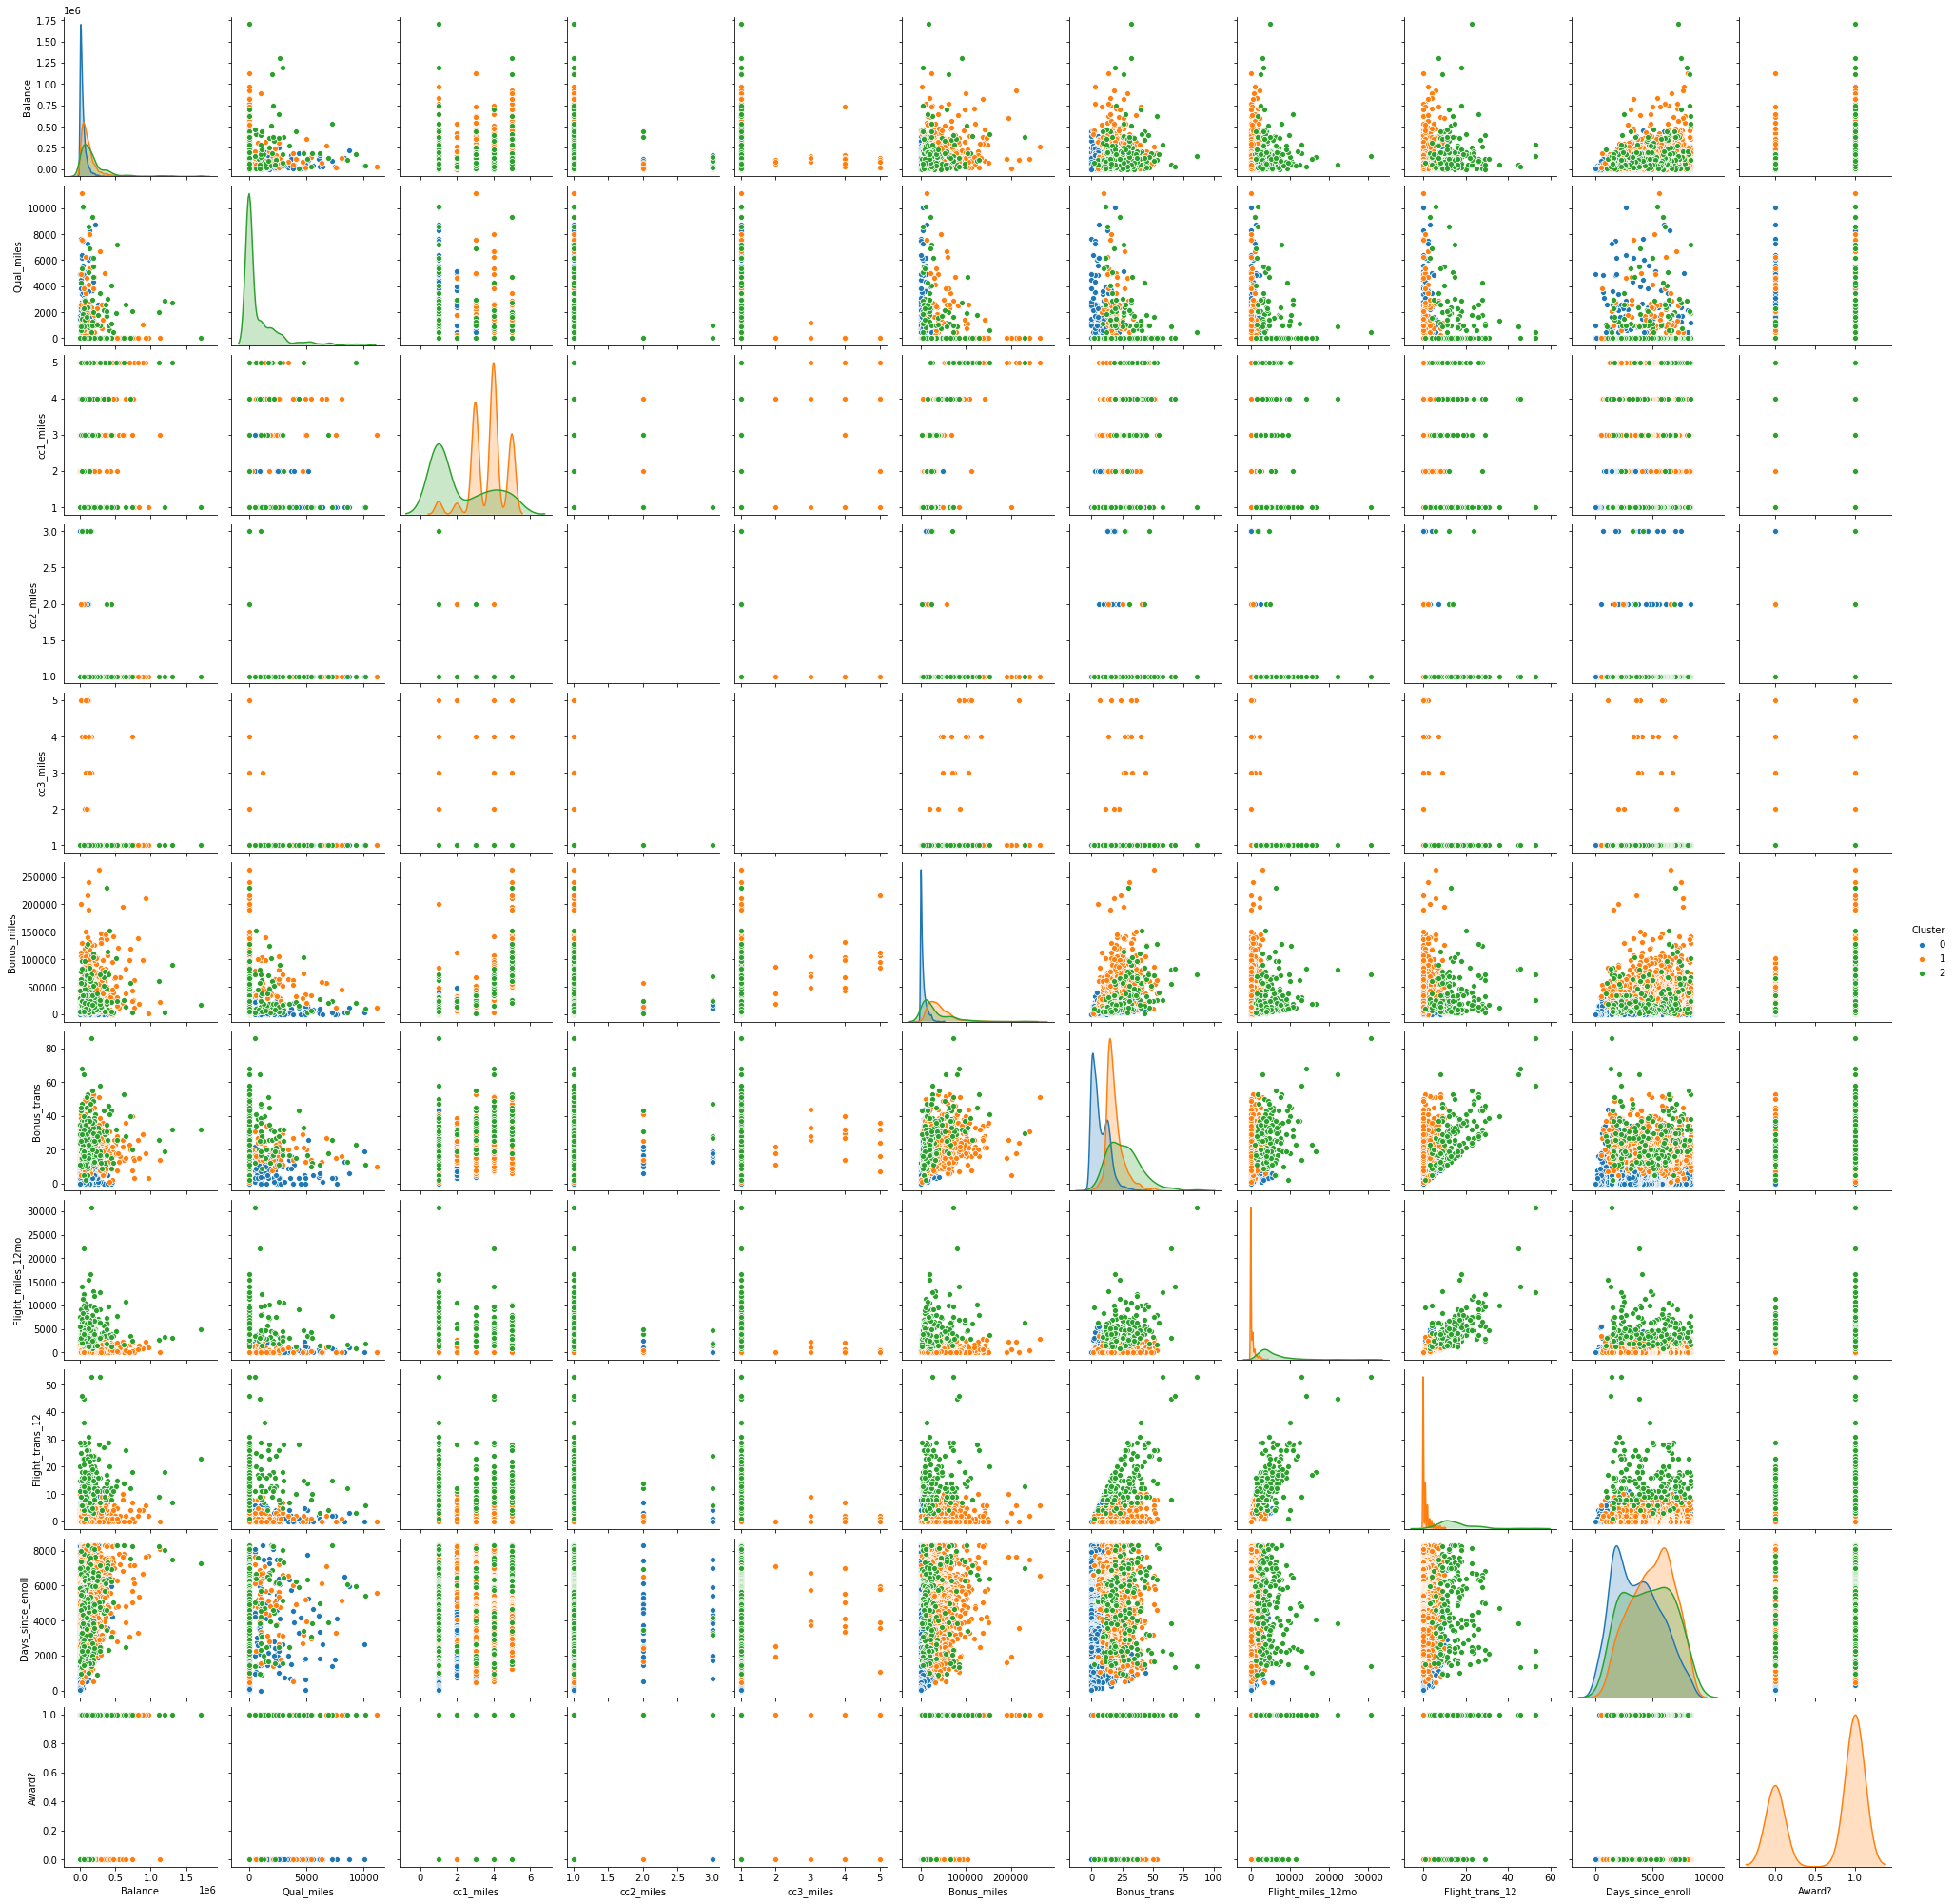

In [18]:
sns.pairplot(data=X,hue='Cluster');

### Hierarchical Clustering

In [19]:
X = df.drop(columns='ID#')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.decomposition import PCA
model = PCA(n_components=2)
X = model.fit_transform(X)

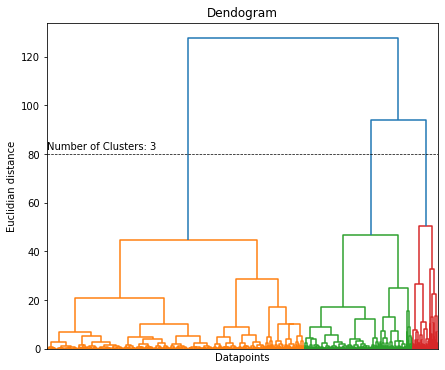

In [23]:
# optimising number of clusters by observing dendrogram

plt.figure(figsize=(7,6))
from scipy.cluster import hierarchy
hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))
plt.xlabel('Datapoints')
plt.ylabel('Euclidian distance')
plt.title('Dendogram')
plt.tick_params(axis='x',labelbottom=False)

plt.axhline(y=80,color='k',ls='--',lw=0.7)
plt.annotate('Number of Clusters: 3',xy=(15,82));


In [25]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
clusters = model.fit_predict(X)

X_df = pd.DataFrame(data=X,columns=['PCA_1','PCA_2'])
X_df['Cluster'] = pd.Series(cluster)
X_df.head()

,PCA_1,PCA_2,Cluster
0,-1.466674,-0.067183,0
1,-1.450564,-0.063743,0
2,-1.210051,-0.133555,0
3,-1.507201,-0.061529,0
4,3.006984,-0.185534,1


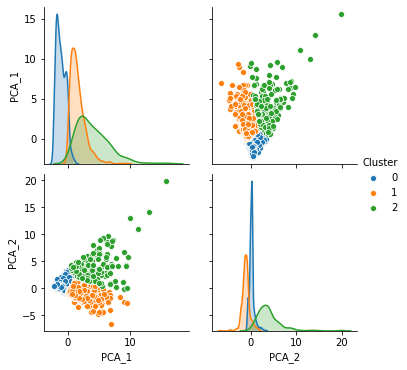

In [26]:
sns.pairplot(data=X_df,hue='Cluster');

### DBSCAN- Density Based Spatial Clustering of Algorithm with Noise

In [27]:
X = df.drop(columns='ID#')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.decomposition import PCA
model = PCA(n_components=2)
X = model.fit_transform(X)

In [33]:
from sklearn.cluster import DBSCAN
for d in np.arange(0.1,0.5,0.1):
    for n in range(5,10):
        model = DBSCAN(eps=d,min_samples=n)
        model.fit(X)
        labels = model.labels_
        print(f'threshold distance:{round(d,3)}     Number of samples:{n}     labels:{np.unique(labels).tolist()}')

threshold distance:0.1     Number of samples:5     labels:[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
threshold distance:0.1     Number of samples:6     labels:[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
threshold distance:0.1     Number of samples:7     labels:[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
threshold distance:0.1     Number of samples:8     labels:[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
threshold distance:0.1     Number of samples:9     labels:[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
threshold distance:0.2     Number of samples:5     labels:[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
threshold distance:0.2     Number of samples:6     labels:[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
threshold distance:0.2     Number of samples:7     labels:[-1, 0, 1, 2, 3, 4]
threshold distance:0.2     Number of samples:8     labels:[-1, 0, 1, 2, 3]
threshold distance:0.2     Number of samples:9     labels:[-1, 0, 1, 2]
threshold distance:0.3     Number of samples:5 

In [52]:
model = DBSCAN(eps=0.2,min_samples=9)
model.fit(X)
labels = model.labels_
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  -1  495]
 [   0 3477]
 [   1   13]
 [   2   14]]


In [37]:
# DBSCAN doesnt seem to perform as good as Kmeans and Hierarchical clustering algorithms here

# Thank you!